## Package Imports

In [2]:
#pip list --outdated

In [3]:
#pip install --upgrade numpy pandas seaborn matplotlib scikit-learn scipy imbalanced-learn

In [4]:
#pip install seaborn matplotlib

In [5]:
# Data Manipulation
import numpy as np
import pandas as pd
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [6]:
# general plot styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)
%matplotlib inline

In [7]:
import scipy.stats as stats
from sklearn.preprocessing import  MinMaxScaler

## Data Import

In [9]:
data = pd.read_excel('DryBeanDataSet.xlsx')

## Data Exploration

In [11]:
data.shape
# 13611 row instances, 20 descriptive feature columns and 1 class feature column

(13611, 22)

In [12]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [13]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness',
       'EquivDiameter', 'Colour', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6', 'Class', 'Sort order'],
      dtype='object')

In [14]:
data.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   Constantness     13611 non-null  int64  
 8   EquivDiameter    13611 non-null  float64
 9   Colour           13611 non-null  object 
 10  Extent           13611 non-null  object 
 11  Solidity         13611 non-null  float64
 12  roundness        13611 non-null  float64
 13  Compactness      13611 non-null  object 
 14  ShapeFactor1     13611 non-null  float64
 15  ShapeFactor2     13611 non-null  float64
 16  ShapeFactor3     13611 non-null  float64
 17  ShapeFactor4

In [15]:
data.describe()
# a negative minimum for ConvexArea
# abnormally large max EquivDiameter

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Solidity,roundness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,Sort order
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53765.692602,0.902873,4.762541e+02,0.987143,0.873282,0.006564,0.001716,0.643590,2.368097,0.995063,0.500271
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29778.009358,0.296142,2.583687e+04,0.004660,0.059520,0.001128,0.000596,0.098996,0.871619,0.004366,0.287926
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,-30.000000,0.000000,1.614174e-01,0.919246,0.489618,0.002778,0.000564,0.410339,0.695579,0.947687,0.000089
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,1.000000,2.150680e+02,0.985670,0.832096,0.005900,0.001154,0.581359,1.614151,0.993703,0.248187
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,1.000000,2.384380e+02,0.988283,0.883157,0.006645,0.001694,0.642044,2.368757,0.996386,0.503810
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,1.000000,2.794522e+02,0.990013,0.916869,0.007271,0.002170,0.696006,3.115695,0.997883,0.750096
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,1.000000,3.014441e+06,0.994677,0.990685,0.010451,0.003665,0.974767,3.966119,0.999733,0.999985


In [16]:
data.describe(include=['O'])
# Incorrect ? values

,Colour,Extent,Compactness,ShapeFactor6,Class
count,13611,13611,13611,13611,13611
unique,5,13530,13526,13607,8
top,brown,?,?,?,DERMASON
freq,6115,6,18,5,3542


In [17]:
data.duplicated().sum()
# no duplicate rows

0

In [18]:
data.Class.unique()

array(['CALI', 'DERMASON', 'SEKER', 'BOMBAY', 'SIRA', '?', 'HOROZ',
       'BARBUNYA'], dtype=object)

In [19]:
data.ShapeFactor5.unique().size
# Distinct values

13543

In [20]:
data.ConvexArea.sort_values()[:5]
# one negative value

3941       -30
3780     20684
5884     20772
12095    20825
3824     20988
Name: ConvexArea, dtype: int64

In [21]:
data.EquivDiameter.sort_values()[-5:]
# two incorrect large values

1833    5.624084e+02
4585    5.658031e+02
2070    5.693744e+02
2762    2.410035e+04
4780    3.014441e+06
Name: EquivDiameter, dtype: float64

In [22]:
data.Constantness.value_counts()
# unbalanced

Constantness
1    12289
0     1322
Name: count, dtype: int64

In [23]:
data.Class.value_counts()['?']

17

Extent, Compactness and ShapeFactor6 are incorrectly stored as an objects (they should be float64)
Colour (6), Extent (6), Compactness (18), ShapeFactor6 (5) and Class (17) incorrectly contain '?' values (they should be N/A)
ConvexArea incorrectly contains a negative value (it should be N/A) 
EquivDiameter incorrectly contains 2 extreme large values (it my be a data collection error where the decimal point was placed incorrectly)

Area: Outliers; 
Perimeter: Outliers; 
MajorAxisLength: Outliers; 
MinorAxisLength: Outliers; 
'AspectRatio: Outliers; 
'Eccentricit: Outliers; 
'ConvexAre: Outliers and a negative value; 
'Constantnes: Imbalanced; 
 'EquivDiamet: 2 False Outliers; 
 'Colo: Incorrect ? Values; 
 'Exte: Incorrect ? Values -> Incorrect Dtype; 
 'Solidi: Outliers; 
 'roundne: Outliers; 
  'Compactn: Incorrect ? Values -> Incorrect Dtype; 
, 'ShapeFact: Outliers; 
, 'ShapeFact: Outliers; 
, 'ShapeFact: Outliers; 
   'ShapeFac: Distinct; 
', 'ShapeFac: Outliers; 
', 'ShapeFac: Incorrect ? Values -> Incorrect Dtype; 
', 'C: Incorrect ? Values; 

No duplicate data. No Missing values. Incorrect values causing incorrect data type detection. Data entry errors. 

To do: change ? to N/A, correct dtypes, impute missing and incorrect values if necessary, normalise numerical variables, one-hot encode categorical variables (D), bin numerical variables (D), ss',

## Data Cleaning

In [26]:
#data.Extent.value_counts()['?']

In [27]:
# Replace ? with N/A to correct Dtypes
data.Colour.replace(to_replace='?', value=np.nan, inplace=True)
data.Extent.replace(to_replace='?', value=np.nan, inplace=True)
data.Compactness.replace(to_replace='?', value=np.nan, inplace=True)
data.ShapeFactor6.replace(to_replace='?', value=np.nan, inplace=True)
data.Class.replace(to_replace='?', value=np.nan, inplace=True)
#data.Extent.dtype
#data.Compactness.dtype
#data.ShapeFactor6.dtype

In [28]:
# Replace negatives with N/A
data.ConvexArea[3941]=np.nan
#data.index[data.ConvexArea == -30].tolist()

/tmp/ipykernel_5276/608223517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.ConvexArea[3941]=np.nan


In [29]:
# Replace large false values with N/A
data.EquivDiameter[2762]=np.nan
data.EquivDiameter[4780]=np.nan
#data.index[data.EquivDiameter > 1000].tolist()

/tmp/ipykernel_5276/2153003762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.EquivDiameter[2762]=np.nan
/tmp/ipykernel_5276/2153003762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.EquivDiameter[4780]=np.nan


In [30]:
# Remove row entries with missing values in target Class (only 17)
#data.Class.isnull().sum()
data.dropna(subset=['Class'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [31]:
data.shape

(13594, 22)

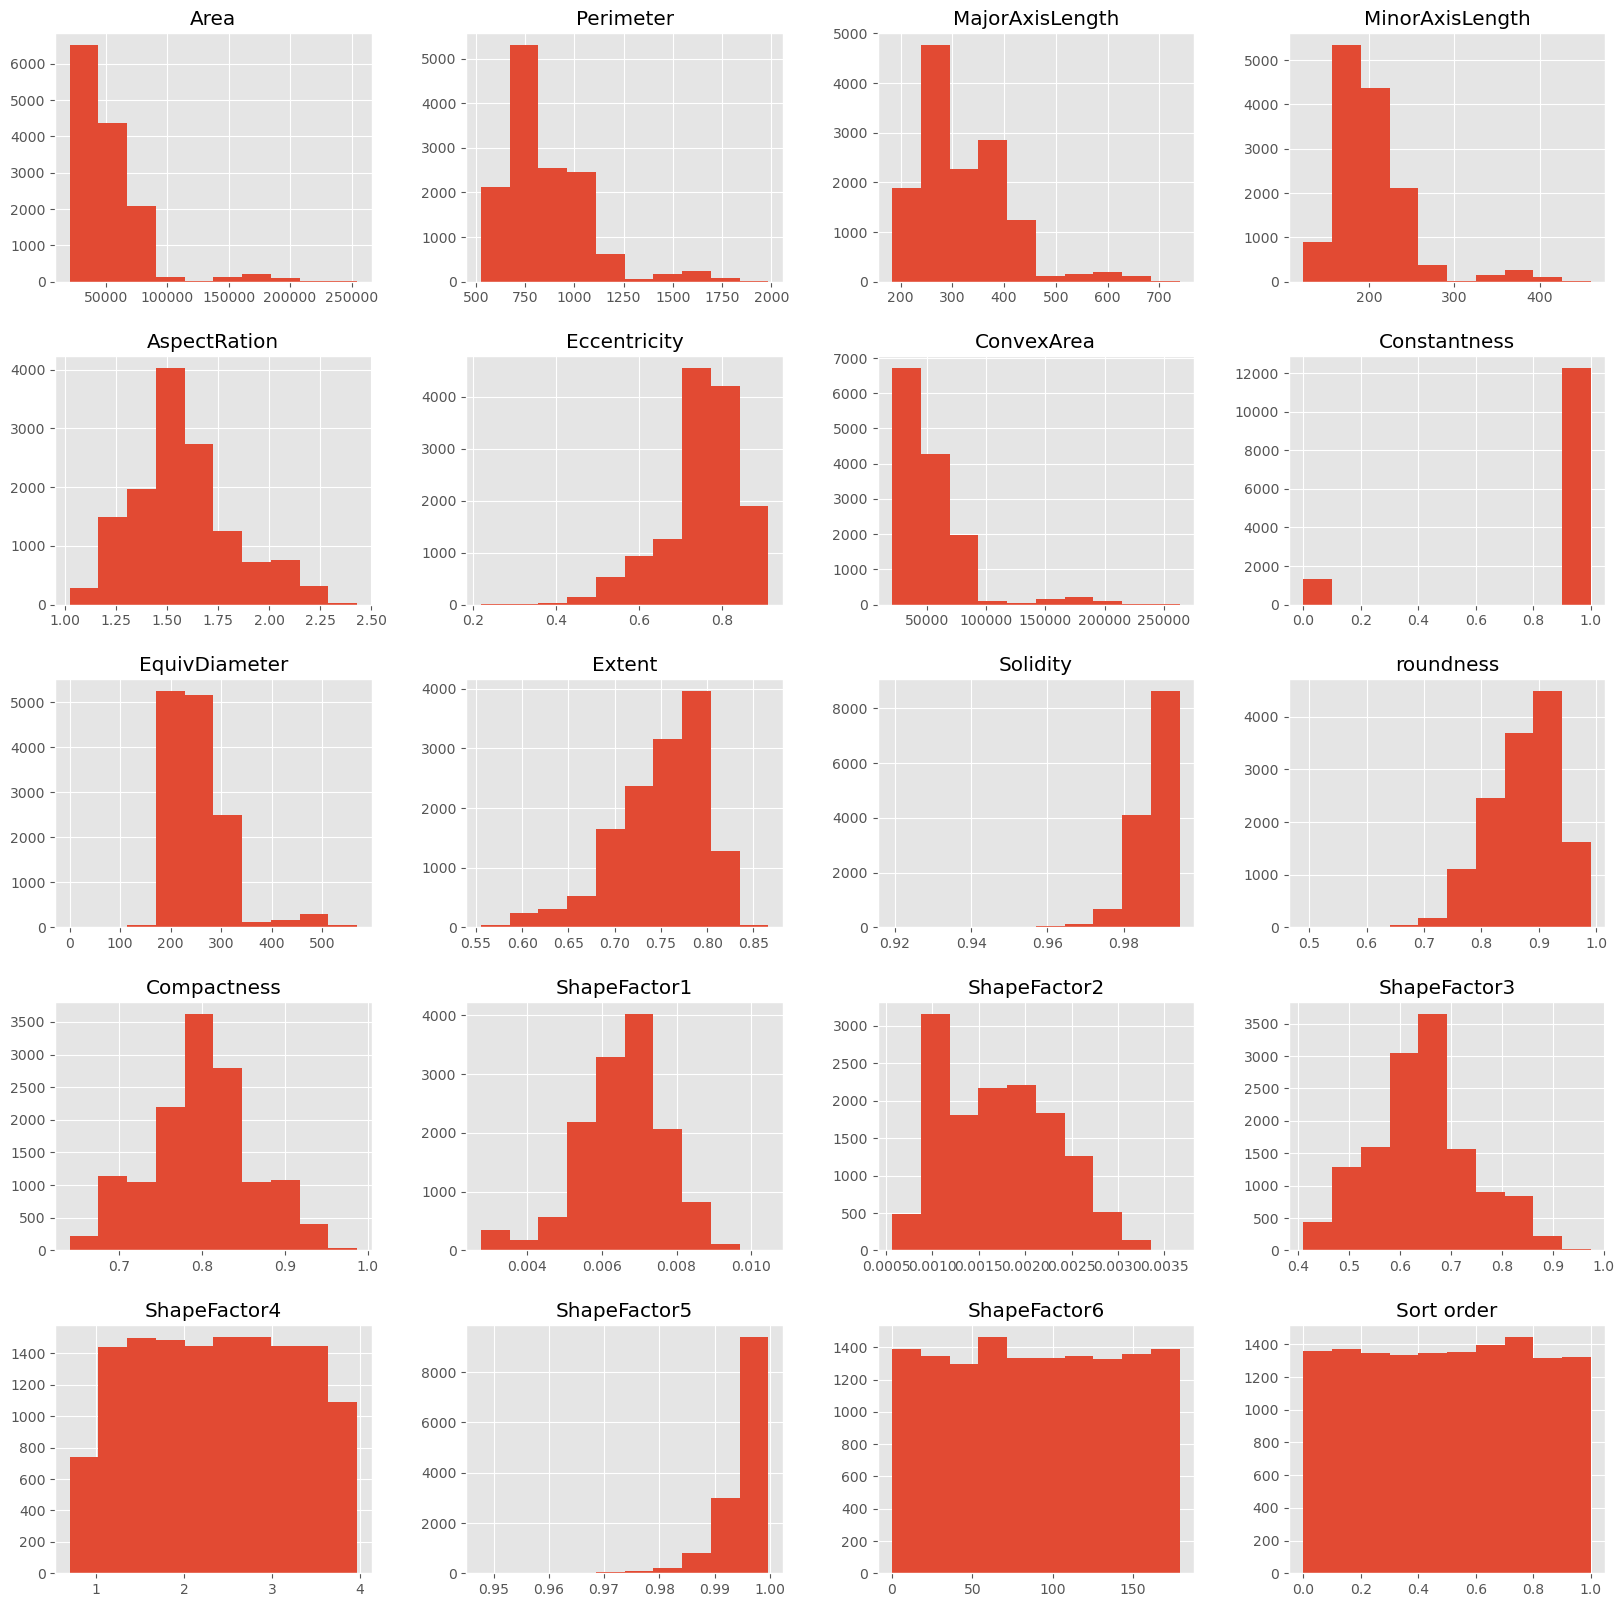

In [32]:
data.hist(figsize=(20,20))
plt.show()

In [33]:
data_k = data.copy() # for k-NN
data_d = data.copy() # for classification tree

## Preprocessing for k-NN

In [35]:
data_k.columns[data.isna().any()].tolist()

['ConvexArea',
 'EquivDiameter',
 'Colour',
 'Extent',
 'Compactness',
 'ShapeFactor6']

In [36]:
missing_k = ['ConvexArea', 'EquivDiameter', 'Colour', 'Extent', 'Compactness', 'ShapeFactor6', 'Class']

In [37]:
data_k[missing_k].dtypes

ConvexArea       float64
EquivDiameter    float64
Colour            object
Extent           float64
Compactness      float64
ShapeFactor6     float64
Class             object
dtype: object

In [38]:
# Median imputation for N/A values of numerical variables
data_k.ConvexArea.fillna(data_k.ConvexArea.median(), inplace=True)
data_k.EquivDiameter.fillna(data_k.EquivDiameter.median(), inplace=True)
data_k.Extent.fillna(data_k.Extent.median(), inplace=True)
data_k.Compactness.fillna(data_k.Compactness.median(), inplace=True)
data_k.ShapeFactor6.fillna(data_k.ShapeFactor6.median(), inplace=True)

# Mode imputation for N/A values of categorical variable
data_k.Colour.mode() #brown
data_k.Colour.replace(to_replace=np.nan, value='brown', inplace=True)

In [39]:
# One hot encoding for categorical data
Colour_code = pd.get_dummies(data_k.Colour)
Colour_code = Colour_code.astype(int)
print(Colour_code)

       black  brown  green  white
0          0      1      0      0
1          1      0      0      0
2          0      0      1      0
3          0      1      0      0
4          0      1      0      0
...      ...    ...    ...    ...
13589      1      0      0      0
13590      0      1      0      0
13591      0      1      0      0
13592      0      0      0      1
13593      0      1      0      0

[13594 rows x 4 columns]


In [40]:
Colour_code.dtypes

black    int64
brown    int64
green    int64
white    int64
dtype: object

In [41]:
data_k.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'Constantness',
       'EquivDiameter', 'Colour', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6', 'Class', 'Sort order'],
      dtype='object')

In [42]:
data_k.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea         float64
Constantness         int64
EquivDiameter      float64
Colour              object
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
ShapeFactor5       float64
ShapeFactor6       float64
Class               object
Sort order         float64
dtype: object

In [43]:
data_k_num_feat = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea',
       'EquivDiameter', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6']
data_k_num = data_k[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea',
       'EquivDiameter', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6']]
data_k_cat = data_k[['Colour']]

In [44]:
# Outlier handling
z_scores = np.abs(stats.zscore(data_k_num))
outliers = np.where(z_scores > 3)  # 3 is a common threshold for outliers

# Replacing Outliers with Median
data_k_num_clean = data_k_num.mask(z_scores > 3, data_k_num.median(), axis=1)

In [63]:
data_k_num

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779.0,328.294351,0.767184,0.975443,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106.0,224.839282,0.757739,0.989977,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190.0,213.603696,0.790885,0.990191,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889.0,532.894907,0.761092,0.987365,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310.0,231.130508,0.721543,0.991657,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,23018,578.382,203.761000,144.297607,1.412089,0.706041,23465.0,171.194123,0.781994,0.980950,0.864665,0.840171,0.008852,0.002721,0.705888,2.197446,0.996776,85.821969
13590,69773,1095.057,387.116310,231.153291,1.674717,0.802155,71055.0,298.056610,0.762446,0.981958,0.731179,0.769941,0.005548,0.001203,0.592809,1.004792,0.992787,152.980591
13591,55773,968.988,347.920243,204.491191,1.701395,0.809040,57047.0,266.481499,0.765377,0.977668,0.746444,0.765927,0.006238,0.001324,0.586644,2.219590,0.998113,102.437378
13592,64235,1005.875,409.304636,201.686606,2.029409,0.870169,65018.0,285.983465,0.773990,0.987957,0.797799,0.698706,0.006372,0.000937,0.488190,2.078504,0.990736,174.754039


In [67]:
# # Count the outliers
# outlier_counts = {}
# for i, col in enumerate(data_k_num.columns):
#     # Count how many z-scores are greater than 3 in the column
#     count = np.sum(z_scores[:, i] > 3)
#     if count > 0:
#         outlier_counts[col] = count
# 
# for variable, count in outlier_counts.items():
#     print(f"Variable '{variable}' has {count} outliers.")

In [68]:
data_k_num_clean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6
0,84648.0,1132.0540,439.915710,248.961941,1.767000,0.824453,86779.0,328.294351,0.767184,0.975443,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833
1,39704.0,736.8730,271.659919,186.481404,1.456767,0.727175,40106.0,224.839282,0.757739,0.989977,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874
2,35835.0,687.9140,237.704180,192.176759,1.236904,0.588537,36190.0,213.603696,0.790885,0.990191,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117
3,44651.5,794.9405,296.880020,192.426878,1.621004,0.787040,45178.0,238.431351,0.761092,0.987365,0.848673,0.782734,0.006646,0.000707,0.612672,3.074472,0.993144,147.347735
4,41957.0,767.1430,287.962974,186.166695,1.546802,0.762918,42310.0,231.130508,0.721543,0.991657,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,23018.0,578.3820,203.761000,144.297607,1.412089,0.706041,23465.0,171.194123,0.781994,0.980950,0.864665,0.840171,0.008852,0.002721,0.705888,2.197446,0.996776,85.821969
13590,69773.0,1095.0570,387.116310,231.153291,1.674717,0.802155,71055.0,298.056610,0.762446,0.981958,0.731179,0.769941,0.005548,0.001203,0.592809,1.004792,0.992787,152.980591
13591,55773.0,968.9880,347.920243,204.491191,1.701395,0.809040,57047.0,266.481499,0.765377,0.977668,0.746444,0.765927,0.006238,0.001324,0.586644,2.219590,0.998113,102.437378
13592,64235.0,1005.8750,409.304636,201.686606,2.029409,0.870169,65018.0,285.983465,0.773990,0.987957,0.797799,0.698706,0.006372,0.000937,0.488190,2.078504,0.990736,174.754039


In [69]:
# Normalisation
scaler = MinMaxScaler()
data_k_num_clean_norm = scaler.fit_transform(data_k_num_clean)

In [70]:
data_k_num_clean_norm_df = pd.DataFrame(data_k_num_clean_norm, columns=data_k_num_clean.columns)

In [71]:
data_k_num_clean_norm_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6
0,0.532818,0.625226,0.651738,0.589845,0.572271,0.800606,0.541816,0.621162,0.624481,0.104891,0.456887,0.309909,0.300084,0.148004,0.277549,0.853507,0.117591,0.283876
1,0.159975,0.218392,0.223909,0.298393,0.333045,0.577582,0.159212,0.236474,0.588659,0.781230,0.757259,0.548546,0.545074,0.487344,0.520096,0.167176,0.896297,0.829727
2,0.127879,0.167990,0.137569,0.324960,0.163505,0.259731,0.127111,0.194696,0.714373,0.791194,0.867830,0.756624,0.513975,0.723969,0.752055,0.647572,0.947644,0.458736
3,0.201018,0.278172,0.288037,0.326127,0.459691,0.714832,0.200790,0.287015,0.601377,0.659716,0.519919,0.416840,0.515809,0.049077,0.383131,0.727370,0.628885,0.823240
4,0.178665,0.249555,0.265363,0.296925,0.402472,0.659528,0.177280,0.259868,0.451378,0.859425,0.679588,0.475210,0.548225,0.410495,0.442889,0.464258,0.817745,0.127907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,0.021552,0.055228,0.051261,0.101620,0.298593,0.529128,0.022797,0.037000,0.680652,0.361172,0.573983,0.585262,0.844417,0.742131,0.559641,0.459211,0.833463,0.479491
13590,0.409419,0.587138,0.517483,0.506773,0.501110,0.749485,0.412918,0.508726,0.606513,0.408049,0.122727,0.379328,0.352388,0.219729,0.345519,0.094545,0.608773,0.854711
13591,0.293279,0.457352,0.417818,0.382403,0.521682,0.765271,0.298087,0.391317,0.617627,0.208398,0.174330,0.367559,0.455130,0.261566,0.333846,0.465982,0.908793,0.572323
13592,0.363477,0.495327,0.573902,0.369321,0.774619,0.905417,0.363429,0.463833,0.650296,0.687253,0.347939,0.170449,0.475061,0.128214,0.147416,0.422843,0.493287,0.976361


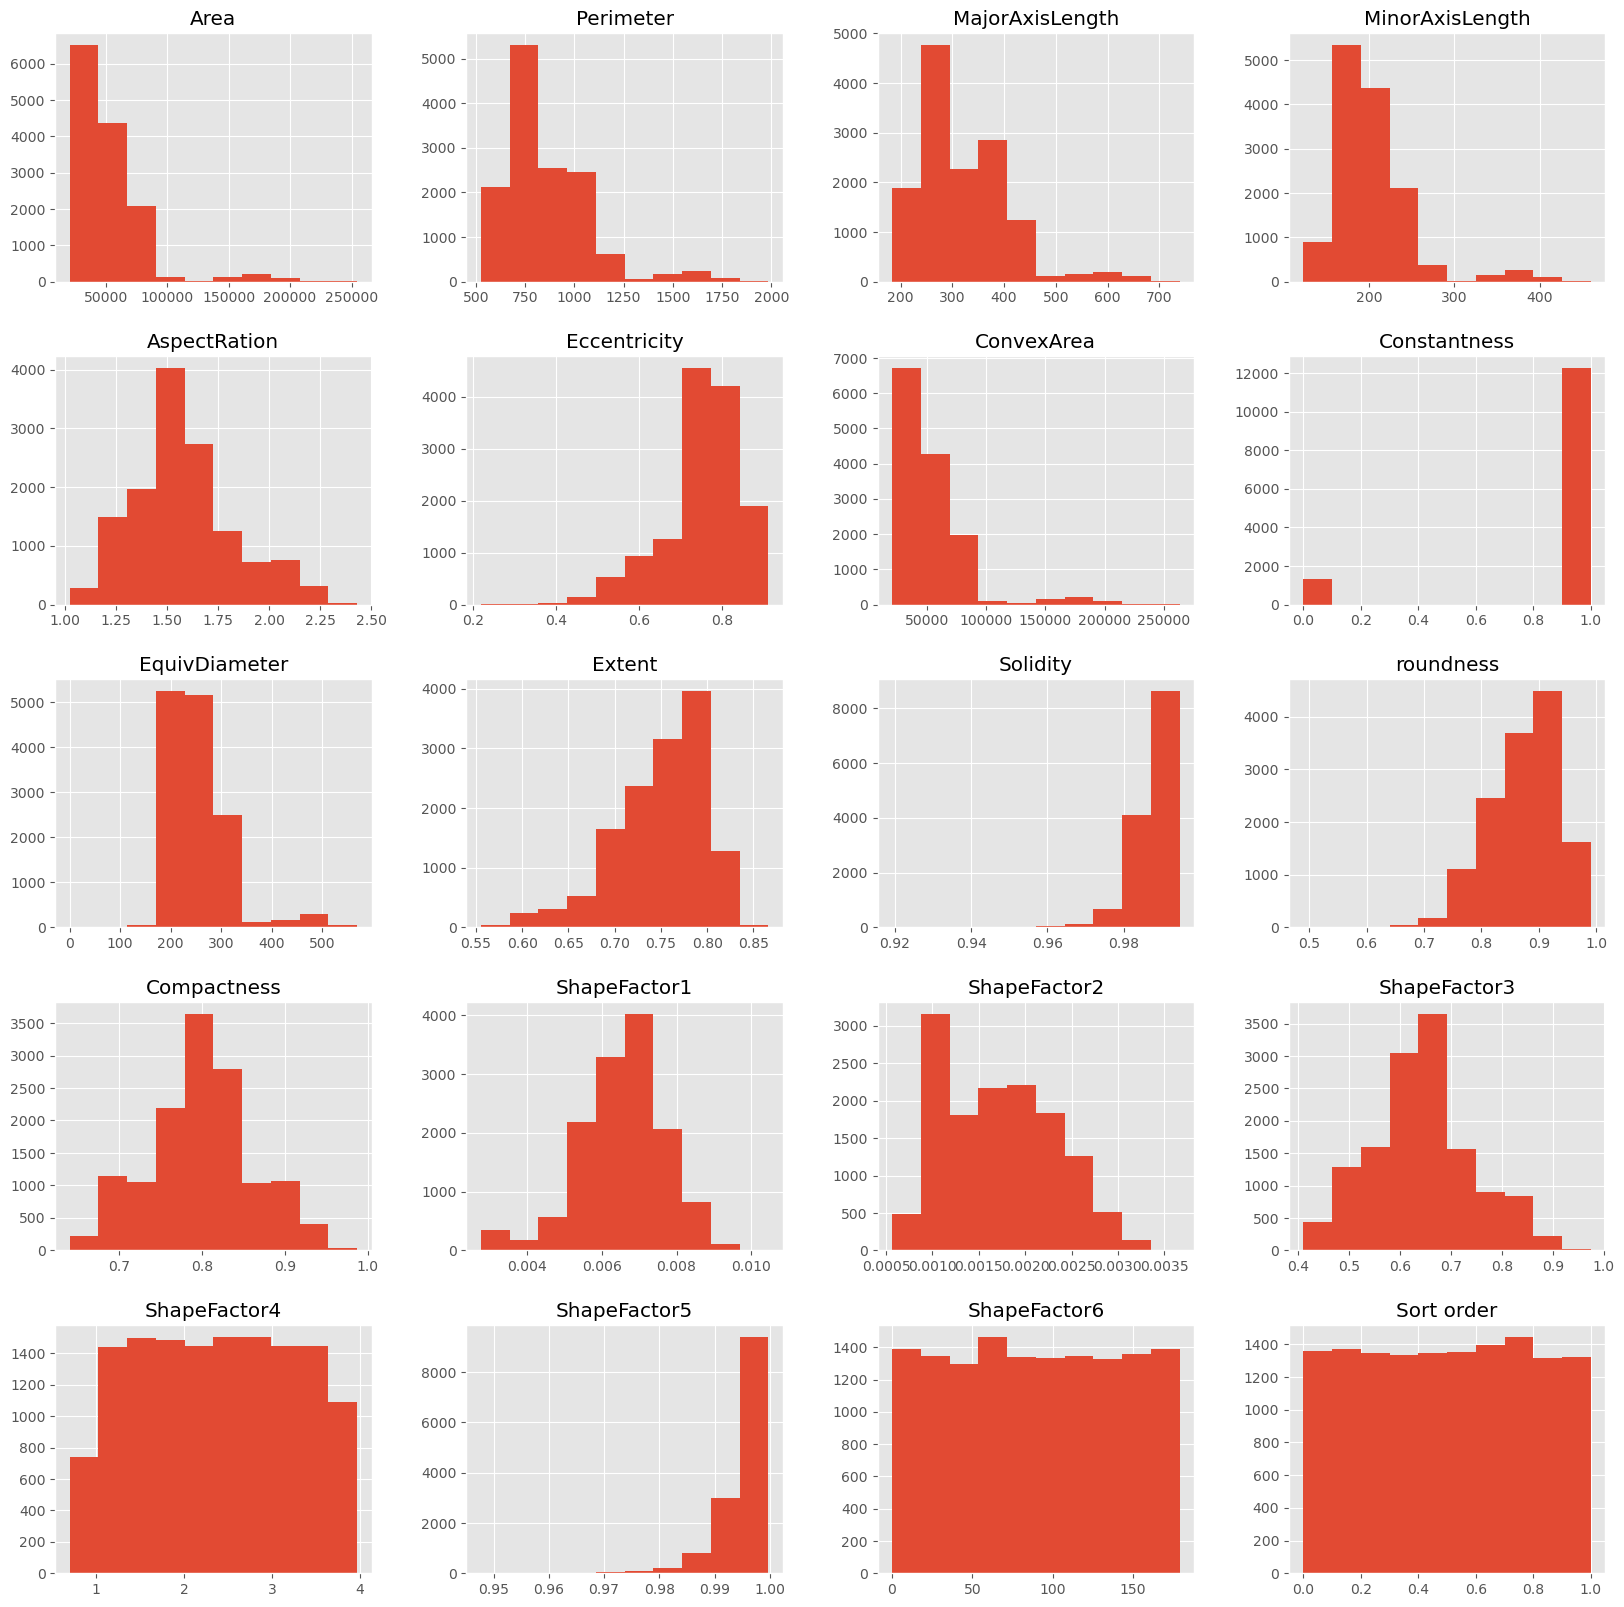

In [72]:
data_k.hist(figsize=(20,20))
plt.show()

In [73]:
data_k.Constantness.unique()

array([1, 0])

In [74]:
data_k.Constantness.dtype

dtype('int64')

In [75]:
data_k_num_clean_norm_df.shape

(13594, 18)

In [76]:
Colour_code.shape

(13594, 4)

In [77]:
data_k_num2 = data_k[['Constantness']]

In [78]:
# Final k-NN features and target
data_k_features = pd.concat([data_k_num2, data_k_num_clean_norm_df, Colour_code], axis=1, ignore_index=True)
data_k_target = data_k.Class

In [79]:
# Final k-NN features
data_k_features

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,0.532818,0.625226,0.651738,0.589845,0.572271,0.800606,0.541816,0.621162,0.624481,...,0.300084,0.148004,0.277549,0.853507,0.117591,0.283876,0,1,0,0
1,1,0.159975,0.218392,0.223909,0.298393,0.333045,0.577582,0.159212,0.236474,0.588659,...,0.545074,0.487344,0.520096,0.167176,0.896297,0.829727,1,0,0,0
2,1,0.127879,0.167990,0.137569,0.324960,0.163505,0.259731,0.127111,0.194696,0.714373,...,0.513975,0.723969,0.752055,0.647572,0.947644,0.458736,0,0,1,0
3,1,0.201018,0.278172,0.288037,0.326127,0.459691,0.714832,0.200790,0.287015,0.601377,...,0.515809,0.049077,0.383131,0.727370,0.628885,0.823240,0,1,0,0
4,1,0.178665,0.249555,0.265363,0.296925,0.402472,0.659528,0.177280,0.259868,0.451378,...,0.548225,0.410495,0.442889,0.464258,0.817745,0.127907,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,1,0.021552,0.055228,0.051261,0.101620,0.298593,0.529128,0.022797,0.037000,0.680652,...,0.844417,0.742131,0.559641,0.459211,0.833463,0.479491,1,0,0,0
13590,1,0.409419,0.587138,0.517483,0.506773,0.501110,0.749485,0.412918,0.508726,0.606513,...,0.352388,0.219729,0.345519,0.094545,0.608773,0.854711,0,1,0,0
13591,0,0.293279,0.457352,0.417818,0.382403,0.521682,0.765271,0.298087,0.391317,0.617627,...,0.455130,0.261566,0.333846,0.465982,0.908793,0.572323,0,1,0,0
13592,1,0.363477,0.495327,0.573902,0.369321,0.774619,0.905417,0.363429,0.463833,0.650296,...,0.475061,0.128214,0.147416,0.422843,0.493287,0.976361,0,0,0,1


In [80]:
data_k_target

0            CALI
1        DERMASON
2           SEKER
3          BOMBAY
4            SIRA
           ...   
13589    DERMASON
13590    BARBUNYA
13591    BARBUNYA
13592       HOROZ
13593        SIRA
Name: Class, Length: 13594, dtype: object

## Train test split (k-NN)

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [84]:
X = data_k_features
y = data_k_target

In [85]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

## K-NN Model

In [87]:
smote_tomek = SMOTETomek(random_state=42)
#X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [88]:
# Resampled dataset shape
#sorted(list(zip(*np.unique(y_resampled, return_counts=True))), key=lambda x: x[1], reverse=True)

In [89]:
# Original dataset shape
#sorted(list(zip(*np.unique(y_train, return_counts=True))), key=lambda x: x[1], reverse=True)

In [90]:
knn = KNeighborsClassifier()

In [91]:
param_grid = {
    'knn__n_neighbors': [3, 5],  # Different k values
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],  # Different distance metrics
    'knn__p': [1, 2]  # p=1 : Manhattan, p=2 : Euclidean in Minkowski distance
}

In [92]:
# Pipeline for SMOTETomek then fits the k-NN model
pipeline = Pipeline([('smote_tomek', smote_tomek),('knn', knn)])

In [93]:
# KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for optimal configuration
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote_tomek',
                                        SMOTETomek(random_state=42)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [3, 5], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [94]:
# Best parameters and score
print(grid_search.best_params_)

{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}


In [95]:
# Best score
print(grid_search.best_score_)

# Evaluate model on test set with the best parameters
best_knn = grid_search.best_estimator_
y_val_pred = best_knn.predict(X_val)

0.9741291581010086


In [96]:
from sklearn.metrics import classification_report

In [97]:
# Validation set
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.88      0.89       263
      BOMBAY       1.00      0.96      0.98       102
        CALI       0.92      0.93      0.93       317
    DERMASON       1.00      1.00      1.00       699
       HOROZ       1.00      1.00      1.00       390
       SEKER       1.00      1.00      1.00       419
        SIRA       0.97      0.99      0.98       529

    accuracy                           0.98      2719
   macro avg       0.97      0.97      0.97      2719
weighted avg       0.98      0.98      0.98      2719



In [98]:
#knn.fit(X_resampled, y_resampled)

In [99]:
y_test_pred = best_knn.predict(X_test)

In [100]:
#y_pred = knn.predict(X_test)

In [129]:
# Classification report for the test set
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.90      0.85      0.87       261
      BOMBAY       1.00      0.98      0.99       113
        CALI       0.90      0.92      0.91       340
    DERMASON       1.00      1.00      1.00       748
       HOROZ       1.00      1.00      1.00       384
       SEKER       1.00      1.00      1.00       388
        SIRA       0.97      0.99      0.98       485

    accuracy                           0.97      2719
   macro avg       0.97      0.96      0.96      2719
weighted avg       0.97      0.97      0.97      2719



## Preprocessing for Clasification tree

In [132]:
# Median imputation for N/A values of numerical variables
data_d.ConvexArea.fillna(data_d.ConvexArea.median(), inplace=True)
data_d.EquivDiameter.fillna(data_d.EquivDiameter.median(), inplace=True)
data_d.Extent.fillna(data_d.Extent.median(), inplace=True)
data_d.Compactness.fillna(data_d.Compactness.median(), inplace=True)
data_d.ShapeFactor6.fillna(data_d.ShapeFactor6.median(), inplace=True)

# Mode imputation for N/A values of categorical variable
data_d.Colour.mode() #brown
data_d.Colour.replace(to_replace=np.nan, value='brown', inplace=True)

In [133]:
data_d_num = data_d[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea',
       'EquivDiameter', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6']]
data_d_cat = data_d[['Colour']]
data_d_bin = data_d[['Constantness']]

In [134]:
# One hot encoding for categorical data
Colour_code = pd.get_dummies(data_d_cat)
Colour_code = Colour_code.astype(int)
Colour_code

,Colour_black,Colour_brown,Colour_green,Colour_white
0,0,1,0,0
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
13589,1,0,0,0
13590,0,1,0,0
13591,0,1,0,0
13592,0,0,0,1


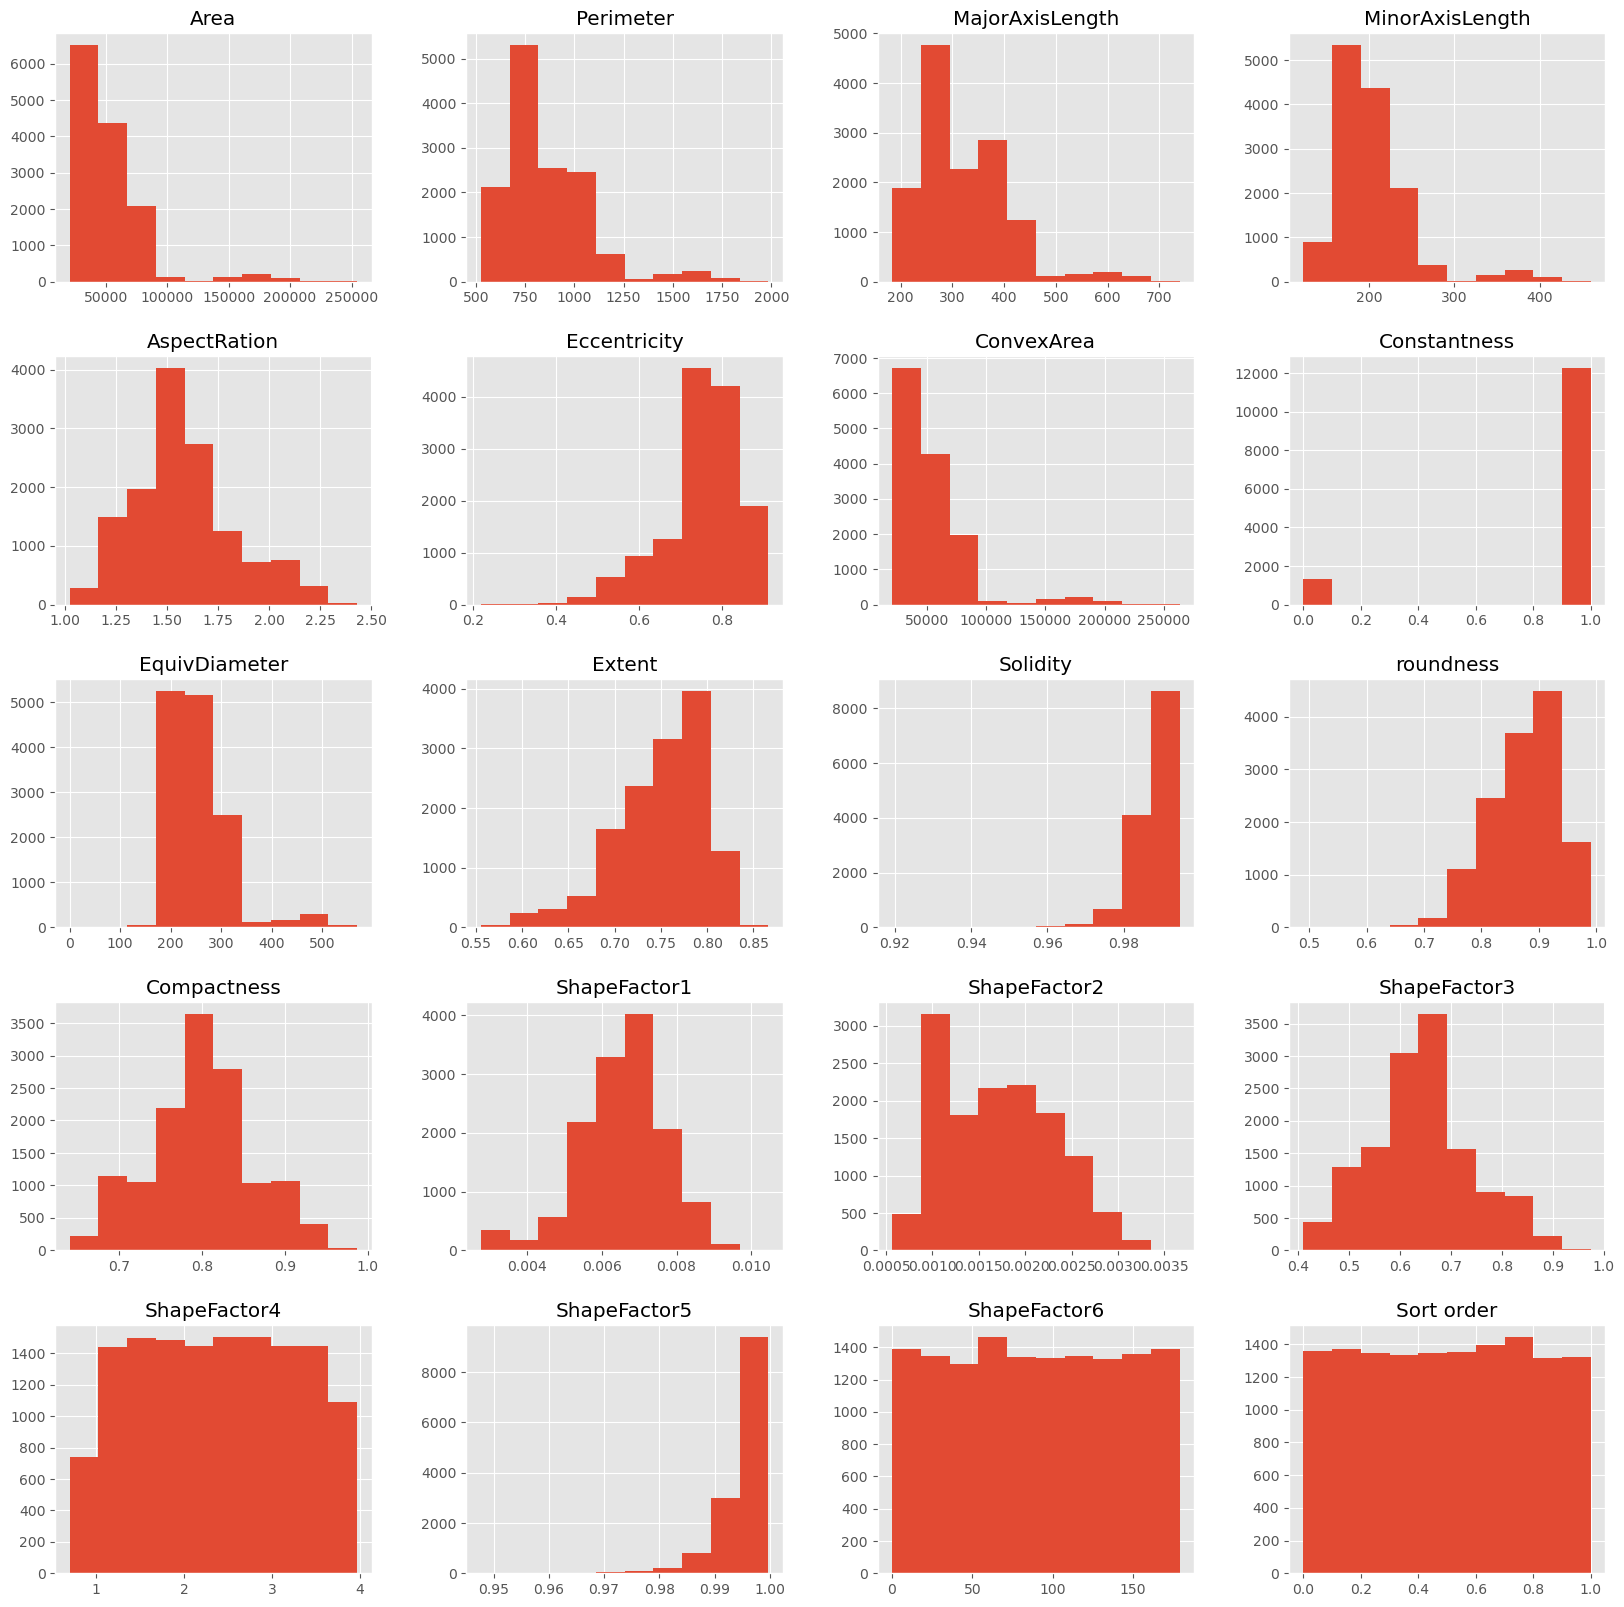

In [135]:
data_d.hist(figsize=(20,20))
plt.show()

In [136]:
from sklearn.preprocessing import KBinsDiscretizer

In [137]:
# Binning the numerical features
num = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'ShapeFactor5', 'ShapeFactor6']

# We'll bin the first 5 features as an example
kbins = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='uniform')
#kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_binned = data_d_num.copy()
df_binned[num] = kbins.fit_transform(data_d_num[num])

In [138]:
df_binned

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6
0,5.0,8.0,9.0,7.0,10.0,17.0,5.0,11.0,13.0,14.0,13.0,6.0,6.0,2.0,5.0,17.0,13.0,5.0
1,1.0,2.0,3.0,3.0,6.0,14.0,1.0,7.0,13.0,18.0,17.0,10.0,10.0,9.0,9.0,3.0,19.0,16.0
2,1.0,2.0,1.0,4.0,3.0,10.0,1.0,7.0,15.0,18.0,18.0,14.0,10.0,13.0,14.0,12.0,19.0,9.0
3,17.0,17.0,17.0,17.0,8.0,16.0,16.0,18.0,13.0,18.0,14.0,8.0,0.0,0.0,7.0,14.0,17.0,16.0
4,1.0,3.0,3.0,3.0,7.0,15.0,1.0,8.0,10.0,19.0,16.0,9.0,10.0,7.0,8.0,9.0,18.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,0.0,0.0,0.0,1.0,5.0,14.0,0.0,6.0,14.0,16.0,14.0,11.0,15.0,13.0,10.0,9.0,18.0,9.0
13590,4.0,7.0,7.0,6.0,9.0,16.0,4.0,10.0,13.0,16.0,9.0,7.0,7.0,4.0,6.0,1.0,17.0,17.0
13591,3.0,6.0,5.0,4.0,9.0,17.0,2.0,9.0,13.0,15.0,10.0,7.0,9.0,4.0,6.0,9.0,19.0,11.0
13592,3.0,6.0,8.0,4.0,14.0,18.0,3.0,10.0,14.0,18.0,12.0,3.0,9.0,2.0,2.0,8.0,16.0,19.0


In [139]:
# Final Classification tree features and target
data_d_features = pd.concat([df_binned, Colour_code, data_d_bin], axis=1, ignore_index=True)
data_d_target = data_d.Class

In [140]:
data_d_features

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,5.0,8.0,9.0,7.0,10.0,17.0,5.0,11.0,13.0,14.0,...,2.0,5.0,17.0,13.0,5.0,0,1,0,0,1
1,1.0,2.0,3.0,3.0,6.0,14.0,1.0,7.0,13.0,18.0,...,9.0,9.0,3.0,19.0,16.0,1,0,0,0,1
2,1.0,2.0,1.0,4.0,3.0,10.0,1.0,7.0,15.0,18.0,...,13.0,14.0,12.0,19.0,9.0,0,0,1,0,1
3,17.0,17.0,17.0,17.0,8.0,16.0,16.0,18.0,13.0,18.0,...,0.0,7.0,14.0,17.0,16.0,0,1,0,0,1
4,1.0,3.0,3.0,3.0,7.0,15.0,1.0,8.0,10.0,19.0,...,7.0,8.0,9.0,18.0,2.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,0.0,0.0,0.0,1.0,5.0,14.0,0.0,6.0,14.0,16.0,...,13.0,10.0,9.0,18.0,9.0,1,0,0,0,1
13590,4.0,7.0,7.0,6.0,9.0,16.0,4.0,10.0,13.0,16.0,...,4.0,6.0,1.0,17.0,17.0,0,1,0,0,1
13591,3.0,6.0,5.0,4.0,9.0,17.0,2.0,9.0,13.0,15.0,...,4.0,6.0,9.0,19.0,11.0,0,1,0,0,0
13592,3.0,6.0,8.0,4.0,14.0,18.0,3.0,10.0,14.0,18.0,...,2.0,2.0,8.0,16.0,19.0,0,0,0,1,1


In [141]:
data_d_target

0            CALI
1        DERMASON
2           SEKER
3          BOMBAY
4            SIRA
           ...   
13589    DERMASON
13590    BARBUNYA
13591    BARBUNYA
13592       HOROZ
13593        SIRA
Name: Class, Length: 13594, dtype: object

## Train test split (Classification tree)

In [143]:
X = data_d_features
y = data_d_target

In [144]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

## Classification Model

In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
smote_tomek = SMOTETomek(random_state=42)
#X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [148]:
dt = DecisionTreeClassifier(random_state=42)

In [149]:
# Original dataset shape
#sorted(list(zip(*np.unique(y_train, return_counts=True))), key=lambda x: x[1], reverse=True)

In [150]:
# Resampled dataset shape
#sorted(list(zip(*np.unique(y_resampled, return_counts=True))), key=lambda x: x[1], reverse=True)

In [173]:
# Define the parameter grid
param_grid2 = {
    'dt__criterion': ['gini', 'entropy'],    # The function to measure the quality of a split
    'dt__max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create a pipeline for SMOTETomek then fits the classification tree model
pipeline2 = Pipeline([('smote_tomek', smote_tomek),('dt', dt)])

# KFold cross-validation
cv2 = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(pipeline2, param_grid2, cv=cv2, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote_tomek',
                                        SMOTETomek(random_state=42)),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_features': [None, 'sqrt', 'log2']},
             scoring='accuracy', verbose=1)

In [174]:
# Best parameters and score
grid_search.best_params_

{'dt__criterion': 'gini', 'dt__max_features': None}

In [175]:
# Best  score
grid_search.best_score_

0.9769496639857659

In [176]:
# Step 7: Evaluate the model on the test set with the best parameters
best_dt = grid_search.best_estimator_

In [177]:
y_val_pred = best_dt.predict(X_val)

# Validation set classification report
classification_report(y_val, y_val_pred)

'              precision    recall  f1-score   support\n\n    BARBUNYA       0.88      0.89      0.88       263\n      BOMBAY       1.00      1.00      1.00       102\n        CALI       0.92      0.91      0.92       317\n    DERMASON       1.00      1.00      1.00       699\n       HOROZ       1.00      1.00      1.00       390\n       SEKER       1.00      1.00      1.00       419\n        SIRA       0.97      0.97      0.97       529\n\n    accuracy                           0.97      2719\n   macro avg       0.97      0.97      0.97      2719\nweighted avg       0.97      0.97      0.97      2719\n'

In [178]:
y_test_pred = best_dt.predict(X_test)

In [179]:
# Test set classification report
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n    BARBUNYA       0.89      0.86      0.87       261\n      BOMBAY       1.00      0.99      1.00       113\n        CALI       0.92      0.92      0.92       340\n    DERMASON       1.00      1.00      1.00       748\n       HOROZ       1.00      1.00      1.00       384\n       SEKER       1.00      1.00      1.00       388\n        SIRA       0.96      0.99      0.97       485\n\n    accuracy                           0.97      2719\n   macro avg       0.97      0.96      0.97      2719\nweighted avg       0.97      0.97      0.97      2719\n'